# Creating Data

In [1]:
#ornek olusturmak icin bir veri seti olusturucusu basit sekilde
from sklearn.datasets import make_circles

#kac adet ornek icerecegi
n_samples = 10000

#olusturalim
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state =43)

Verimizi inceleyelim

In [2]:
X

array([[ 0.64499139, -0.5548348 ],
       [-0.09155029,  0.76526084],
       [-0.59846096, -0.5020346 ],
       ...,
       [-0.66059051, -0.5000104 ],
       [-0.97435605,  0.28935059],
       [-0.48026755, -0.87332996]])

In [3]:
y

array([1, 1, 1, ..., 1, 0, 0])

labellarimiza baktigimizda sadece 0 ve 1 leri goruyoruz yani bi bir binary classification yani ikili siniflandirma verisidir

daha guzel sekilde bakmak icin bir dataframe olsuturalim

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label": y})
circles

,X0,X1,label
0,0.644991,-0.554835,1
1,-0.091550,0.765261,1
2,-0.598461,-0.502035,1
3,-0.750643,-0.255237,1
4,1.021241,-0.013013,0
...,...,...,...
9995,-0.298812,-0.743841,1
9996,-0.834559,0.524279,0
9997,-0.660591,-0.500010,1
9998,-0.974356,0.289351,0


2 girdimiz yani ozelligimiz ve 1 ciktimiz var

plot seklinde bakalim ki verimizi daha iyi anlayalim

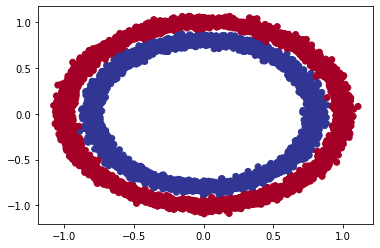

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap= plt.cm.RdYlBu);

burada yapmak istedigimiz sey mavi ve kirmizi noktalari ayirarak onlari siniflandirmak olacaktir

# Input and output shapes

X yani inputlarimiz 2 boyutlu outputlarimiz tek boyutlu

In [6]:
X.shape, y.shape

((10000, 2), (10000,))

ne kadar verimiz vardi?


In [7]:
len(X), len(y)

(10000, 10000)

ilk verimize bakalim

In [8]:
X[0], y[0]

(array([ 0.64499139, -0.5548348 ]), 1)

# Modelling
Modelimizi olusturmaya baslayalim

In [9]:
import tensorflow as tf


In [10]:
#create the model
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1)                        
               ])

#compile the model
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#fit the model
model_1.fit(X, y, epochs= 5)

Epoch 1/5
313/313 [==============================] - 4s 3ms/step - loss: 4.8269 - accuracy: 0.5260
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 5.0990 - accuracy: 0.5106
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 7.7127 - accuracy: 0.5000
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000


accuracy mize baktigimizda basarimiz yeterli degil daha uzun surede egitmeyi deniyelim

In [11]:
#epochs=200
model_1.fit(X, y, epochs= 200,verbose=0)

In [12]:
model_1.evaluate(X,y)

313/313 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712477207183838, 0.5]

epoch sayisini degistirmemizin bir etkisi olmadi baska bir yol deneyelim

modelimize katman ekleyelim ve tekrar deneyelim

In [13]:
#create the model
model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)                        
               ])

#compile the model
model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#fit the model
model_2.fit(X, y, epochs= 100, verbose= 0)

In [14]:
model_2.evaluate(X,y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933327913284302, 0.5]

Yeni katman eklememizin de performansa etkisi olmadi

# Improving our Model

Model performanisni gelistirmek icin yapabilecegimiz bazi basit adimlar var.

* Model olustururken -- Katman eklemek veya gizli katmanlardaki unit sayisini arttirmak (hidden units)
* Compile Asamasinda -- Optimizasyon fonksiyonunu degistirmek.
* Modeli Fit ederken -- Modeli daha uzun surede egitmek yani epochs degerini arttirmak.

In [15]:
#create the model
model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100), #hidden unit sayisni degistirelim
        tf.keras.layers.Dense(10), #yeni bir katman ekleyelim
        tf.keras.layers.Dense(1)                        
               ])

#compile the model
model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), #optimizer i Adam olarak degistirelim
                metrics=["accuracy"])

#fit the model
model_3.fit(X, y, epochs= 100, verbose= 0)

In [16]:
model_3.evaluate(X,y)

313/313 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5062


[0.6931737065315247, 0.5062000155448914]

Modelimizin performansi hala iyilesmedi 

Gorsellestırerek modelimizin neden hiç gelişmediğini sürekli aynı performansı segilediğine bakalım


In [17]:
import numpy as np

#bu fonnsiyon ile modelimizin sinirlarini nasil tahmin ettigine bakcagiz
def plot_decision_boundary(model, X, y):
  
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


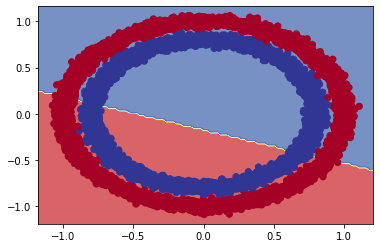

In [18]:
plot_decision_boundary(model_3, X, y)

Gordugunuz gibi verimiz duzgun  bir cizgi ile ikili siniflandirma yapmaya uygun degil. Kirmizi ve mavi noklari duz bir cigi ule ayiramayacagimiz asikar. Lineer bir tahmin cizgisi ile lineer olmayan bir veri kumesini siniflandirma yapamayiz

Regresyon icin modelimizi deneyelim

In [19]:
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

In [20]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [21]:
#create the model
model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(100), 
        tf.keras.layers.Dense(10), 
        tf.keras.layers.Dense(1)                        
               ])

#compile the model
model_4.compile(loss= tf.keras.losses.mae,# regresyon oldugu icin loss umuzu degistirdik
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["mae"])

#fit the model
model_4.fit(X_reg_train, y_reg_train, epochs= 100, verbose= 0)

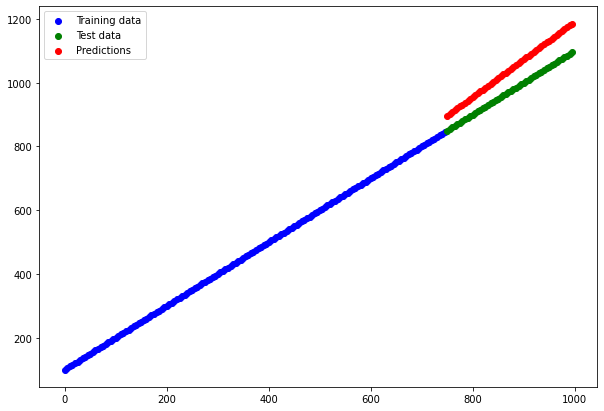

In [22]:
# tahmin yaptiralim
y_reg_preds = model_4.predict(X_reg_test)

# tahminlere goz atalim
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

Modelimiz linner bir veride gayet iyi calistigini gormus olduk. Buraya kadar yapamadigimiz tek sey lineer olmayan verimiz ile ne yapacagimizi bulamadik simdi ona bakalim.

# Non-Linearty

Lineer olmayan bir model olsuturalim

In [23]:
import tensorflow as tf
# 1. Create the model

#aktivasyon fonksiyonunu lineer olmayan bir fonksiyonla degistirdik
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")                              
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy", #loss u bu sekilde de tanimlayabiliriz
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=250, verbose = 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
#evaluate our model
model_5.evaluate(X, y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0269 - accuracy: 0.9915


[0.026911646127700806, 0.9915000200271606]

Dogruluk oranimiz bu sefer gayet yuksek cikti. Biz yine de metriclere guvenmeyelim ve gorunusue bakalim.

doing binary classification


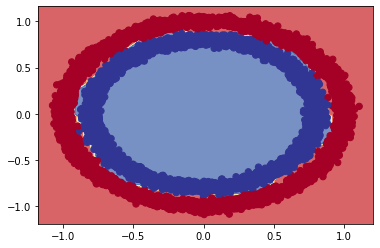

In [25]:
plot_decision_boundary(model_5, X, y)

Bu sefer modelimiz mavi ve kirmizi noktalari ayirmada gayet basarili oldugunu goruyoruz.


Nasil oldugunu anlamak icin sigmoid fonksiyonunu incelememiz yeterli olacaktir

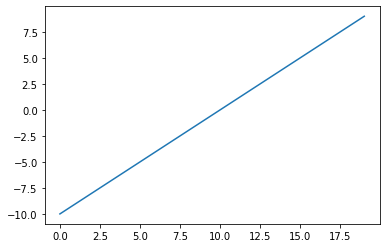

In [26]:
#lineer bir veri tanimlayalim
A = tf.cast(tf.range(-10, 10), tf.float32)
plt.plot(A);

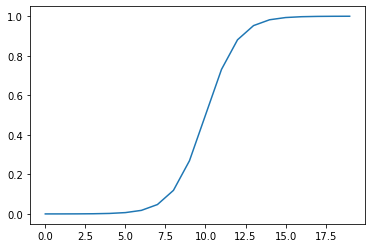

In [27]:
#sigmoid fonksiyonunu tanimlayalim ve lineer verimizi fonksiyona sokalim
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))
plt.plot(sigmoid(A));

# Evaluating and Improving our Classificiation



Modelimizi train ve test olarak bolmemiz gerekir.

In [28]:
len(X)

10000

In [29]:
X_train, y_train = X[:8000], y[:8000]
X_test, y_test = X[8000:], y[8000:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

Modelimizi tekrar olusturalim

In [ ]:
#Creating the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                            
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

In [31]:
model_8.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9945


[0.012374229729175568, 0.9944999814033508]

doing binary classification
doing binary classification


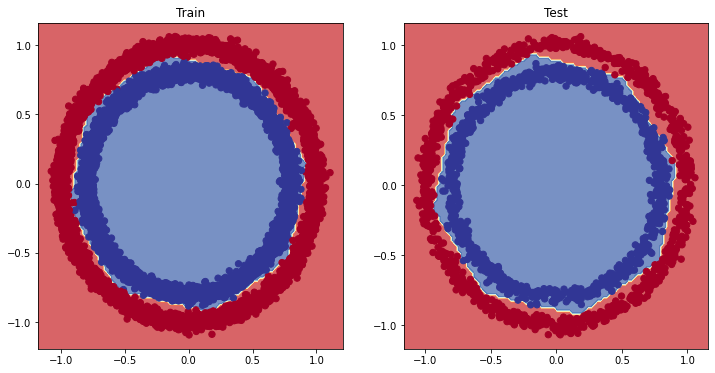

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

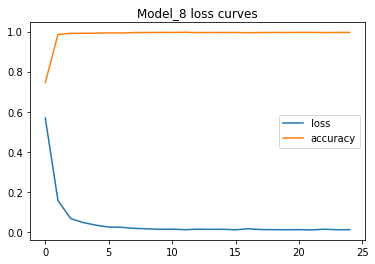

In [36]:
# Modelımızın gelişimini gorselleştirelim
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

En iyi learning rate değerini bulalım.
model_8 ile aynı olacak şekilde sadece learning rateii dinamik bir şeklide değiştireceğiz

In [ ]:
# Create a model 
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# her epochta farklı bir learning rate uygulamak için bir metod
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model 
history_9 = model_9.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

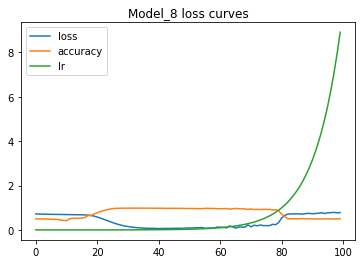

In [38]:
pd.DataFrame(history_9.history).plot()
plt.title("Model_8 loss curves");

Learning rate VS Loss

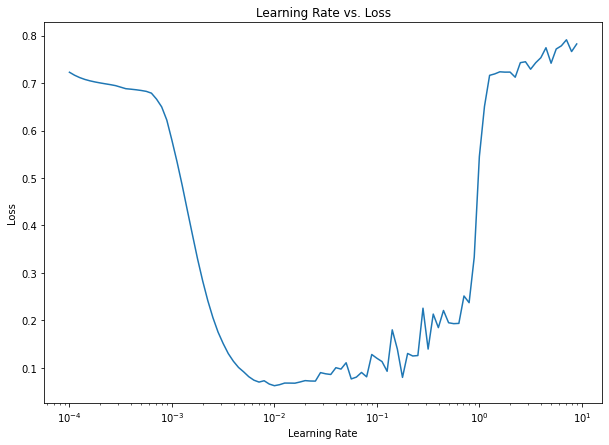

In [40]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss");

Daha yüksek ve idael bir learning rate ile tekrar deneyelim

In [41]:
# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])

# Compile the model 
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model 
history_10 = model_10.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5949 - accuracy: 0.6755
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.1799 - accuracy: 0.9571
Epoch 3/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9940
Epoch 4/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9925
Epoch 5/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0258 - accuracy: 0.9930
Epoch 6/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 7/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9939
Epoch 8/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9899
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0247 - accuracy: 0.9923

In [42]:
model_10.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9935


[0.01687668077647686, 0.9934999942779541]

In [43]:
model_8.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9945


[0.012374229729175568, 0.9944999814033508]

Model8 için learning rate değeri 0.01 model_10 içinse 0.02 olarak belirlemiştik. Model10 daha kısa sürede eğitilmesine rağmen farklı bir learning rate ile performans olarak gayet yakın bir sonuç verdi.

**Confusion Matrix**
Biraz google ile anotomisini inceleyebilriz. 

In [44]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [45]:
y_test[:10] ,y_preds[:10]

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]), array([[1.4650169e-06],
        [2.5416227e-02],
        [1.3410917e-05],
        [9.9658930e-01],
        [2.2099469e-08],
        [2.2478839e-06],
        [2.5894307e-05],
        [4.3229297e-06],
        [6.6438054e-07],
        [3.5499798e-07]], dtype=float32))

Hata almamızın sebebi tahminlerin yani y_preds in aray şeklinde deger dönmesi

In [46]:
tf.round(y_preds)[:10] #bu sorunumuzu cozecek ve tahmin degerlerimizi binary seklinedon nusturecektir

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [47]:
confusion_matrix(y_test, tf.round(y_preds))

array([[1018,    2],
       [  11,  969]])

Gorsellestirmek icin scikit-learn sitesinde yer alan bir kod blogunu kullancaigiz

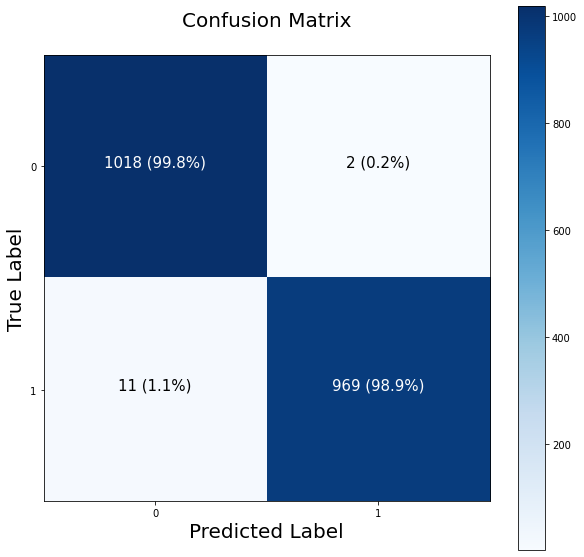

In [48]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels, 
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Confusion matrixin ne ifade ettigini arastiralim